<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [147]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [148]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [149]:
import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [150]:
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  #Parameters can be seen as list beta and gamma

In [151]:
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [152]:
import pandas as pd
from random import sample

In [153]:
S_value = pd.DataFrame(P)
S_value.to_csv("Susceptible.csv")

In [154]:
I_value = pd.DataFrame(Q)
I_value.to_csv("Infected.csv")

In [155]:
R_value = pd.DataFrame(M)
R_value.to_csv("Recovered.csv")

In [254]:
S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [255]:
sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]
  



In [256]:
infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]
  



In [257]:
recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  



In [249]:
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

In [258]:
infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

In [259]:
recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [260]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [270]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)


In [271]:
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5
0,205.964168,4.509550e+00,789.526281,266.120746,4.112895e+00,790.200464
1,834.256107,7.563672e+01,90.107169,223.119514,8.371204e+01,102.571236
2,210.777622,1.124682e+01,777.975561,238.594935,1.027232e+01,779.658182
3,988.086882,6.421044e+00,5.492074,206.268878,7.478357e+00,6.577577
4,206.603445,5.419783e+00,787.976772,304.776859,4.944009e+00,788.787113
...,...,...,...,...,...,...
9995,202.845902,3.226666e-06,797.154095,202.845939,2.343163e-06,797.154096
9996,984.083544,8.394465e+00,7.521992,814.508696,1.405654e+01,13.441177
9997,202.845915,2.200506e-05,797.154063,202.845900,1.598016e-05,797.154074
9998,202.845900,2.498095e-07,797.154100,984.083544,1.817447e-07,797.154100


In [272]:
X = data[[0,1,2]]
y = data[[3,4,5]]

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list, verbose=0)
#model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 00001: val_accuracy improved from -inf to 0.68813, saving model to weights-improvement-01-0.69.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy did not improve from 0.68813

Epoch 00003: val_accuracy did not improve from 0.68813

Epoch 00004: val_accuracy did not improve from 0.68813

Epoch 00005: val_accuracy did not improve from 0.68813

Epoch 00006: val_accuracy did not improve from 0.68813

Epoch 00007: val_accuracy did not improve from 0.68813

Epoch 00008: val_accuracy improved from 0.68813 to 0.87063, saving model to weights-improvement-08-0.87.hdf5

Epoch 00009: val_accuracy improved from 0.87063 to 0.90000, saving model to weights-improvement-09-0.90.hdf5

Epoch 00010: val_accuracy improved from 0.90000 to 0.90062, saving model to weights-improvement-10-0.90.hdf5

Epoch 00011: val_accuracy improved from 0.90062 to 0.90438, saving model to weights-improvement-11-0.90.hdf5

Epoch 00012: val_accuracy did not improve from 0.90438

Epoch 00013: val_accuracy did not improve from 0.90438

Epoch 00014: val_accuracy did not improve from 0.90438

Epoch 00015: val_accuracy did not improve from 0.90438


In [276]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 23us/step
Accuracy: 90.15


In [279]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)

In [283]:
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [286]:
df_7      #columns are in S,I,R order

,0,1,2
0,303.126068,0.0,788.747314
1,303.126068,0.0,788.747314
2,372.370422,0.0,529.940918
3,303.126068,0.0,788.747375
4,303.126068,0.0,788.747375
...,...,...,...
7995,303.122986,0.0,788.732971
7996,301.479156,0.0,781.041077
7997,624.490234,0.0,0.000000
7998,303.126038,0.0,788.747314


In [294]:
y_train

,3,4,5
9254,227.592830,3.322735e-05,797.154044
1561,202.845900,1.518044e-05,797.154075
1670,202.845900,1.209959e+02,539.215315
6087,211.195137,2.563610e-07,797.154100
6669,993.121146,5.991042e-06,797.154090
...,...,...,...
5734,202.845900,1.732855e-02,797.124942
5191,232.805177,2.781007e+01,748.704691
5390,958.658494,1.258225e+00,0.258877
860,995.302427,1.276309e-04,797.153886


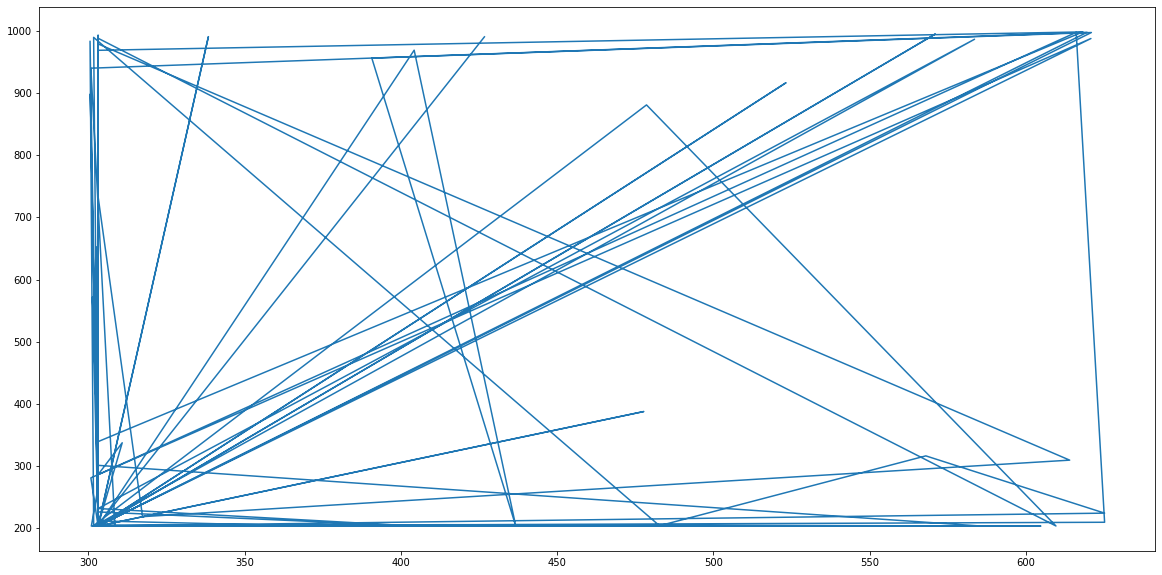

In [306]:
plt.figure(figsize=(20,10))
plt.plot(df_7[0].iloc[0:100],y_train[3].iloc[0:100])